# Name: Luke Pratley

## Statistical analysis of IoU scores
The metric used to compare the detection against the ground truth is the [Intersection over Union](https://en.wikipedia.org/wiki/Jaccard_index) or IoU. It is a measure of how much the detection and ground truth labels overlap. The IoU is calculated as $${\rm IoU} = \frac{|Y \cap \hat{Y}|}{|Y \cup \hat{Y}|}\, $$ where $Y$ is the set of predicted classifications and $\hat{Y}$ is the set of ground truth classifications, and $|\dot|$ is the cardinally of a set.

A high IoU score suggests that the predicted and the ground truth extracted features overlap, while a low IoU score suggests they do not.

First we import some libraries that we will find useful:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

import pickle
import itertools

Here we are opening the IoU metrics that have been saved from the trained models

In [2]:
with open('iou_metric_test_results.pkl', 'rb') as file:
      
    model_metrics = pickle.load(file)
  

In [3]:
models = list(model_metrics.keys())
iou_info = list(model_metrics[models[0]].keys())
areas_of_interest = list(model_metrics[models[0]][iou_info[0]].keys())

The models are:

In [4]:
models

['efficient_model_dice',
 'efficient_model_entropy',
 'model_dice',
 'model_entropy',
 'res_model_dice',
 'res_model_entropy',
 'attention_model_dice',
 'attention_model_entropy']

Information relating to the IoU metrics that we have loaded. We have the file path for each road and building IoU metric and the corresponding index for that file.

In [38]:
iou_info

['road_iou',
 'building_iou',
 'road_file',
 'road_index',
 'building_file',
 'building_index']

We have the area of interest for the particular IoU that was measured:

In [39]:
areas_of_interest

['AOI_2_Vegas', 'AOI_3_Paris', 'AOI_4_Shanghai', 'AOI_5_Khartoum']

Now we are creating a list of unique pairs for the model comparisons:

In [40]:
pairs = list(itertools.product(models, models))
for p in pairs:
    p2 = (p[1], p[0])
    if p2 in pairs:
        pairs.remove(p)

In [45]:
print(f'There are {len(pairs)} model pairs that are unique.')

There are 38 model pairs that are unique.


Below we plot out the distribution of IoU values.

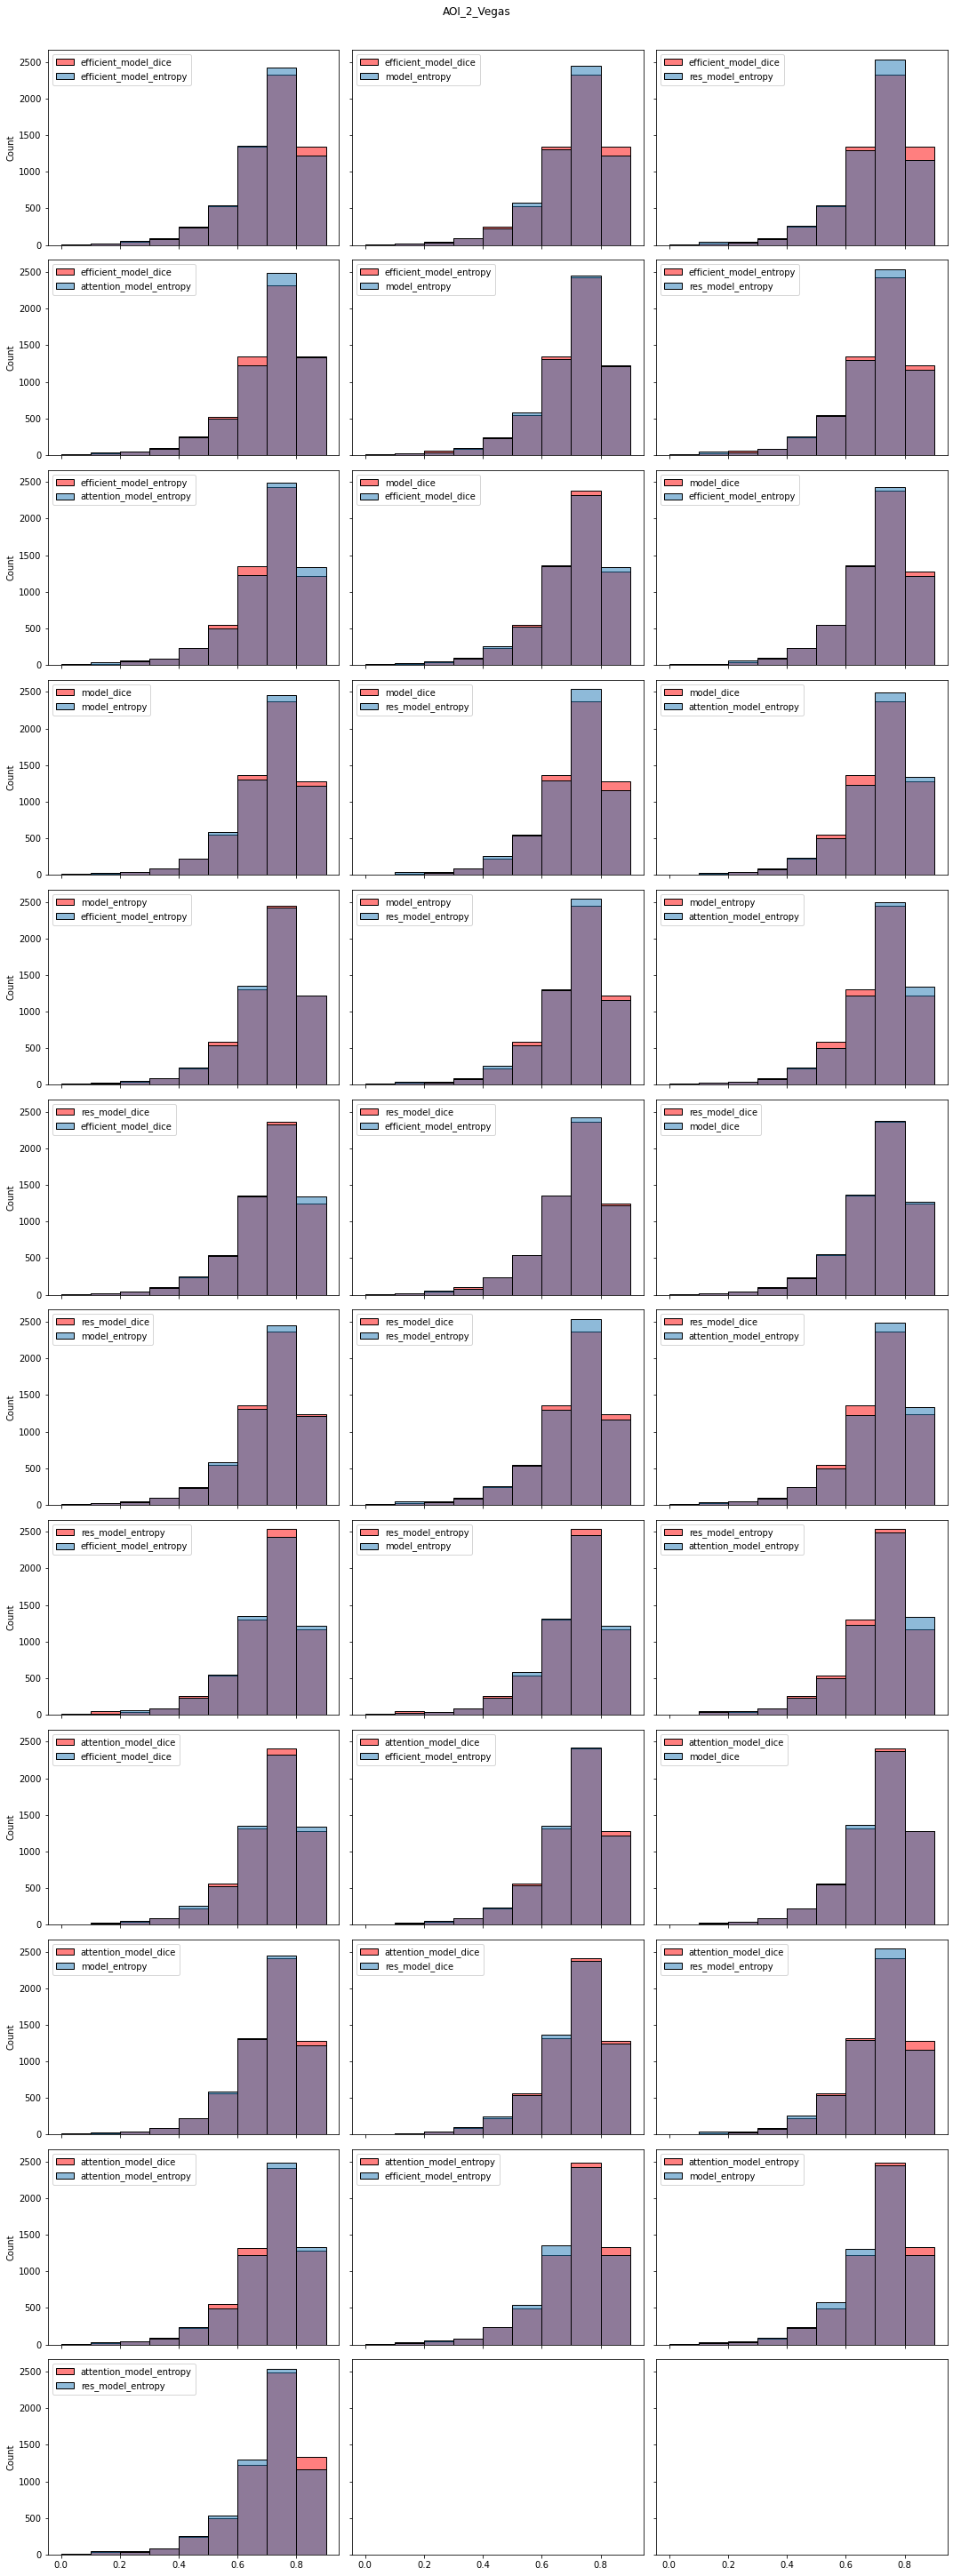

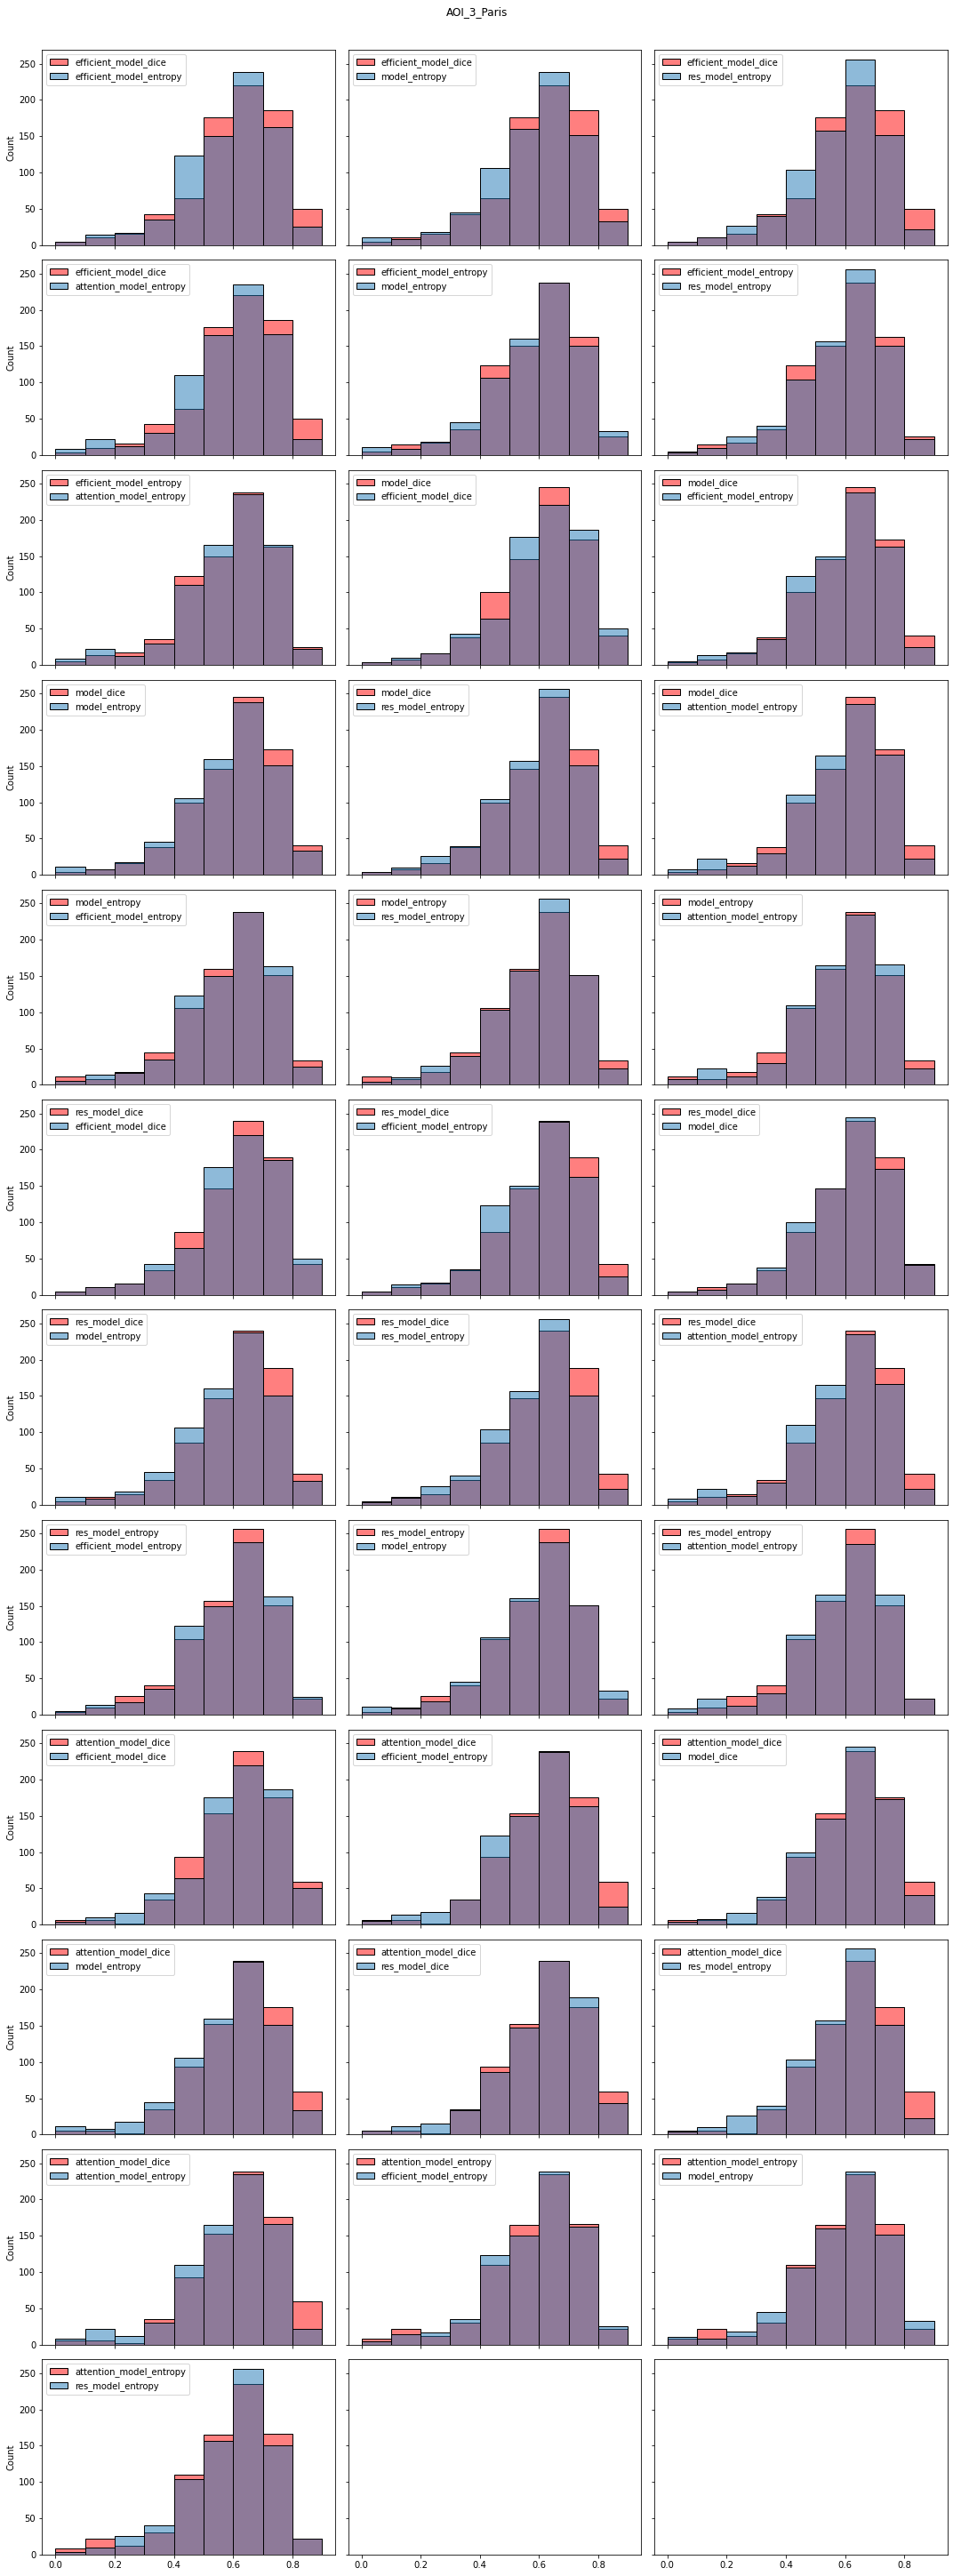

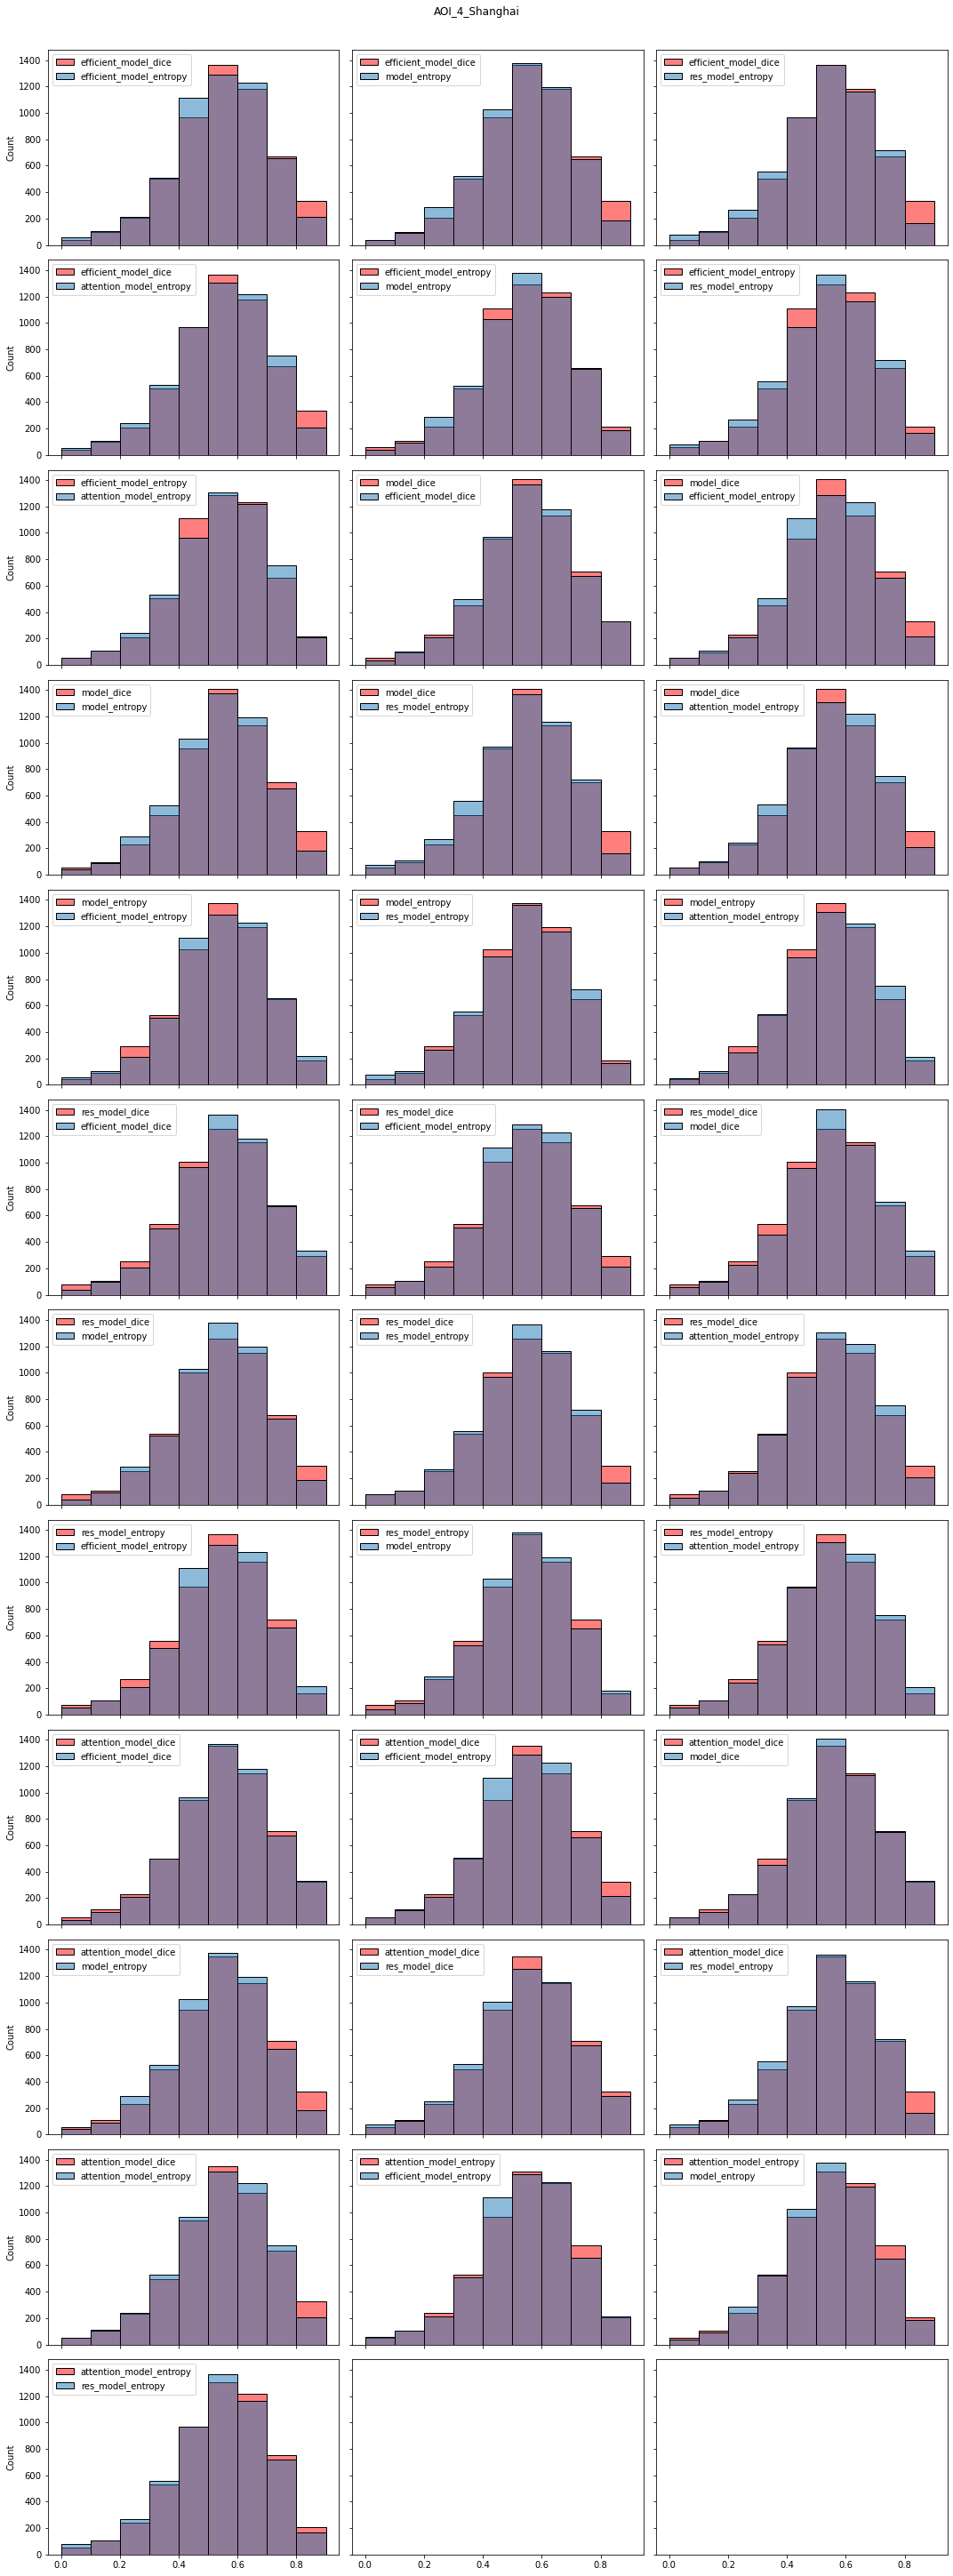

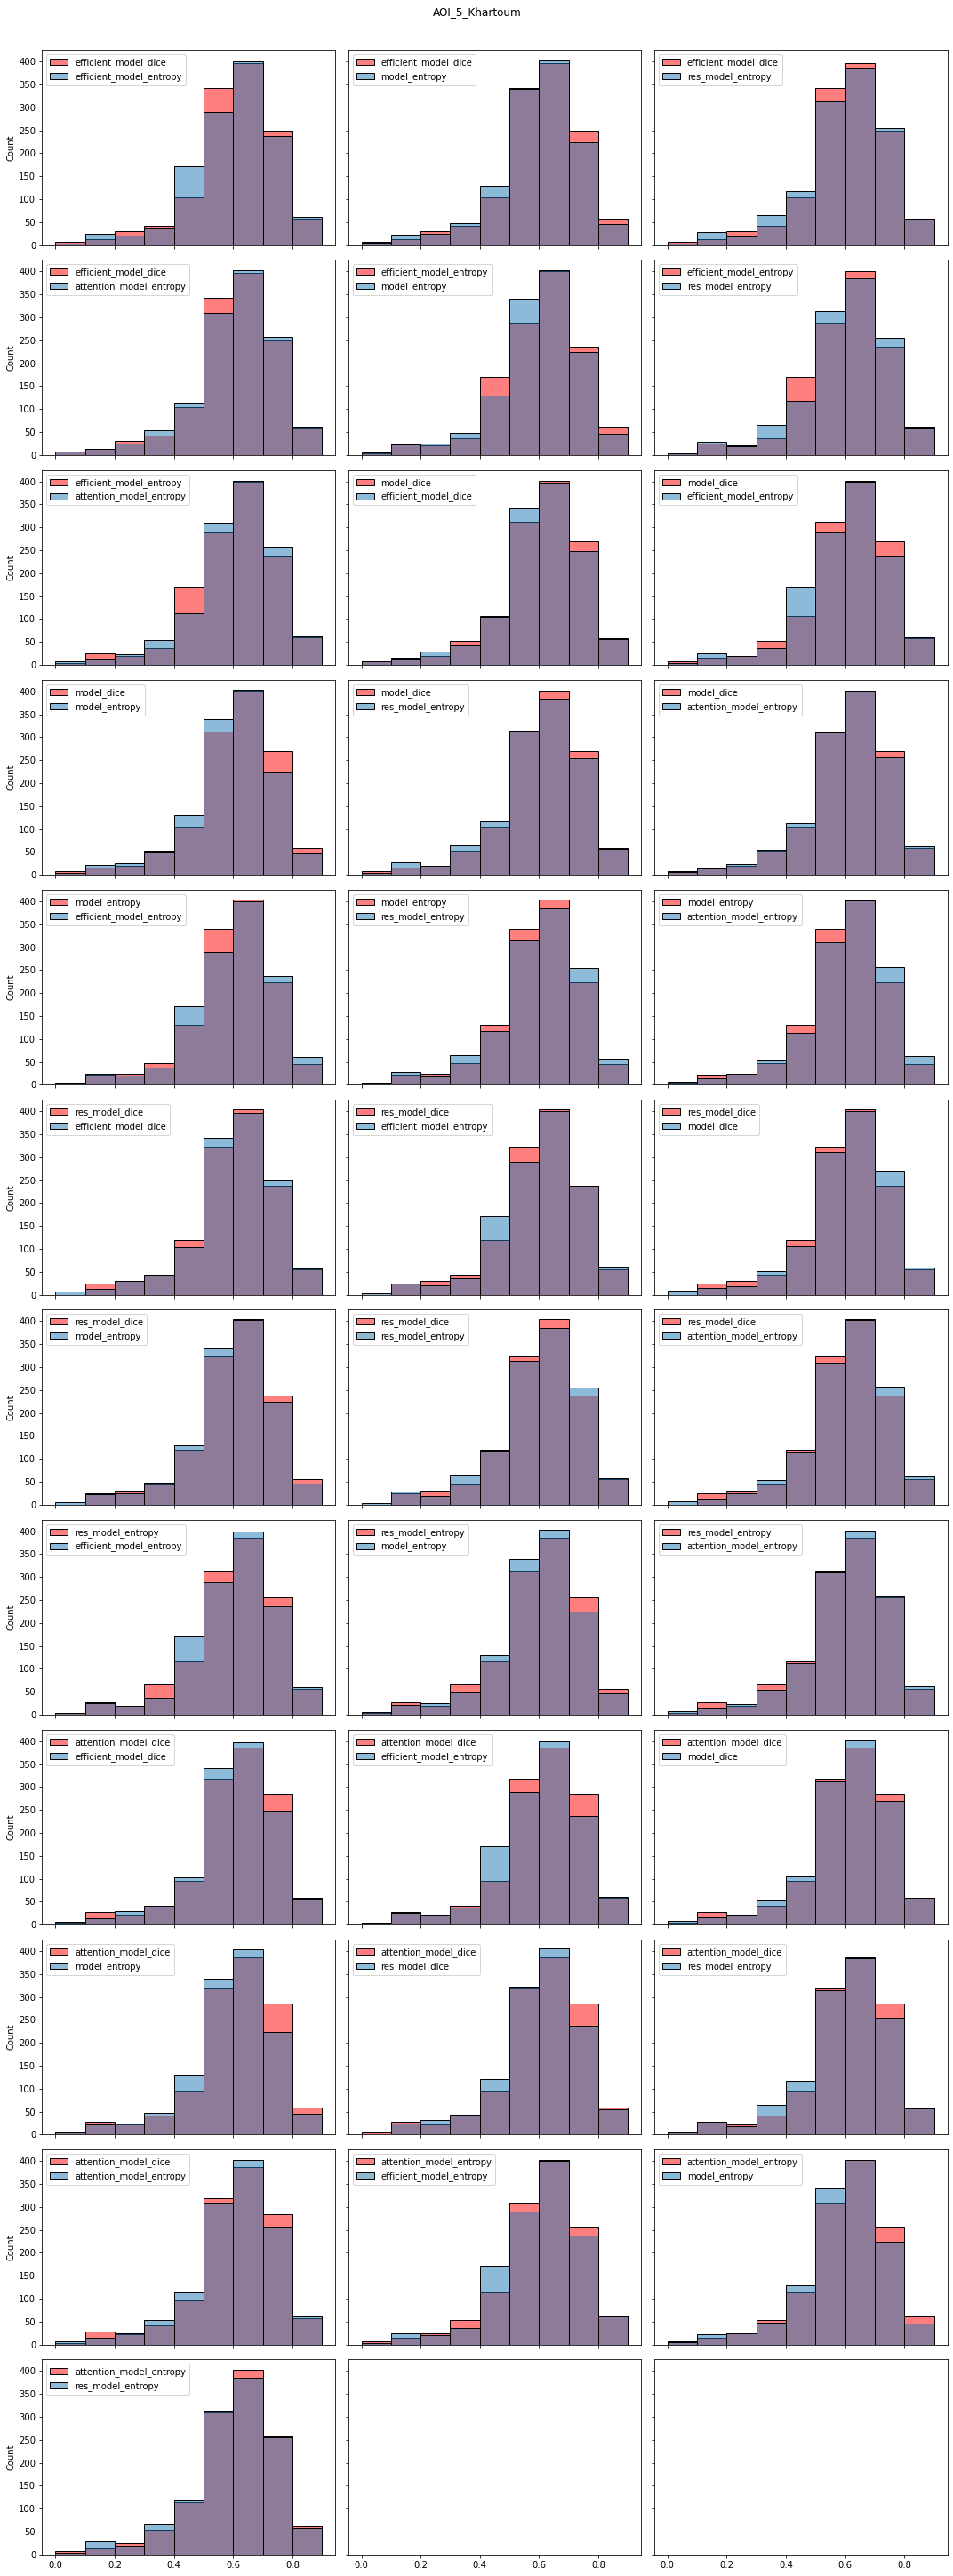

In [46]:
p_values_dict = {}
for area in areas_of_interest:
    p_values_dict[area] = pd.DataFrame(index=models, columns=models)
    fig, axs = plt.subplots(nrows=12,ncols=3,sharex=True, sharey=True, figsize=(3 * 5, 8 * 5))
    axs = np.ravel(axs)
    fig.suptitle(area, y = 1.005)
    count = 0
    for m1, m2 in pairs:
        if m1 != m2:
            ax = axs[count]
            sns.histplot(x=model_metrics[m1]['road_iou'][area], bins=np.arange(0, 1, 0.1), label=f'{m1}', ax=ax, color='red', alpha=0.5)
            sns.histplot(x=model_metrics[m2]['road_iou'][area], bins=np.arange(0, 1, 0.1), label=f'{m2}', ax=ax, alpha=0.5)
            ax.legend(loc="upper left")
            _, p_val = stats.ttest_ind(model_metrics[m1]['road_iou'][area], model_metrics[m2]['road_iou'][area], alternative ='greater')
            p_values_dict[area].loc[m1, m2] = p_val
            #print(f'[{area}] The for {m1} > {m2} p-value is {p_val: 0.5f}')
            count += 1
    fig.tight_layout()
    plt.show()

In [10]:
for key in p_values_dict.keys():
    print(key)
    display(p_values_dict[key])

AOI_2_Vegas


,efficient_model_dice,efficient_model_entropy,model_dice,model_entropy,res_model_dice,res_model_entropy,attention_model_dice,attention_model_entropy
efficient_model_dice,NaN,0.1417,NaN,0.130681,NaN,0.066649,NaN,0.925098
efficient_model_entropy,NaN,NaN,NaN,0.479491,NaN,0.329116,NaN,0.994272
model_dice,0.559981,0.175361,NaN,0.16248,NaN,0.085672,NaN,0.946145
model_entropy,NaN,0.520509,NaN,NaN,NaN,0.347825,NaN,0.995036
res_model_dice,0.713102,0.304693,0.661804,0.287075,NaN,0.171835,NaN,0.977876
res_model_entropy,NaN,0.670884,NaN,0.652175,NaN,NaN,NaN,0.998381
attention_model_dice,0.236835,0.035599,0.190187,0.031818,0.098999,0.012906,NaN,0.768317
attention_model_entropy,NaN,0.005728,NaN,0.004964,NaN,0.001619,NaN,NaN


AOI_3_Paris


,efficient_model_dice,efficient_model_entropy,model_dice,model_entropy,res_model_dice,res_model_entropy,attention_model_dice,attention_model_entropy
efficient_model_dice,NaN,0.001766,NaN,0.000782,NaN,0.001512,NaN,0.001115
efficient_model_entropy,NaN,NaN,NaN,0.379644,NaN,0.49292,NaN,0.42722
model_dice,0.769037,0.012082,NaN,0.00589,NaN,0.010795,NaN,0.008026
model_entropy,NaN,0.620356,NaN,NaN,NaN,0.614912,NaN,0.548701
res_model_dice,0.4582,0.001213,0.19878,0.000527,NaN,0.001028,NaN,0.000758
res_model_entropy,NaN,0.50708,NaN,0.385088,NaN,NaN,NaN,0.433349
attention_model_dice,0.161681,0.000032,0.038085,0.000012,0.188612,0.000025,NaN,0.000019
attention_model_entropy,NaN,0.57278,NaN,0.451299,NaN,0.566651,NaN,NaN


AOI_4_Shanghai


,efficient_model_dice,efficient_model_entropy,model_dice,model_entropy,res_model_dice,res_model_entropy,attention_model_dice,attention_model_entropy
efficient_model_dice,NaN,0.000004,NaN,0.0,NaN,0.0,NaN,0.000942
efficient_model_entropy,NaN,NaN,NaN,0.163514,NaN,0.03612,NaN,0.907401
model_dice,0.620068,0.00002,NaN,0.0,NaN,0.0,NaN,0.002695
model_entropy,NaN,0.836486,NaN,NaN,NaN,0.201696,NaN,0.989318
res_model_dice,0.999405,0.146554,0.998283,0.022962,NaN,0.002819,NaN,0.591058
res_model_entropy,NaN,0.96388,NaN,0.798304,NaN,NaN,NaN,0.999007
attention_model_dice,0.84571,0.000373,0.76107,0.000007,0.013242,0.0,NaN,0.019981
attention_model_entropy,NaN,0.092599,NaN,0.010682,NaN,0.000993,NaN,NaN


AOI_5_Khartoum


,efficient_model_dice,efficient_model_entropy,model_dice,model_entropy,res_model_dice,res_model_entropy,attention_model_dice,attention_model_entropy
efficient_model_dice,NaN,0.143261,NaN,0.037607,NaN,0.121446,NaN,0.528807
efficient_model_entropy,NaN,NaN,NaN,0.243115,NaN,0.455581,NaN,0.870426
model_dice,0.232167,0.037302,NaN,0.006243,NaN,0.030251,NaN,0.256653
model_entropy,NaN,0.756885,NaN,NaN,NaN,0.717988,NaN,0.966841
res_model_dice,0.662338,0.257844,0.87428,0.087129,NaN,0.224801,NaN,0.687032
res_model_entropy,NaN,0.544419,NaN,0.282012,NaN,NaN,NaN,0.890473
attention_model_dice,0.184511,0.026482,0.430727,0.00411,0.095414,0.021329,NaN,0.206135
attention_model_entropy,NaN,0.129574,NaN,0.033159,NaN,0.109527,NaN,NaN


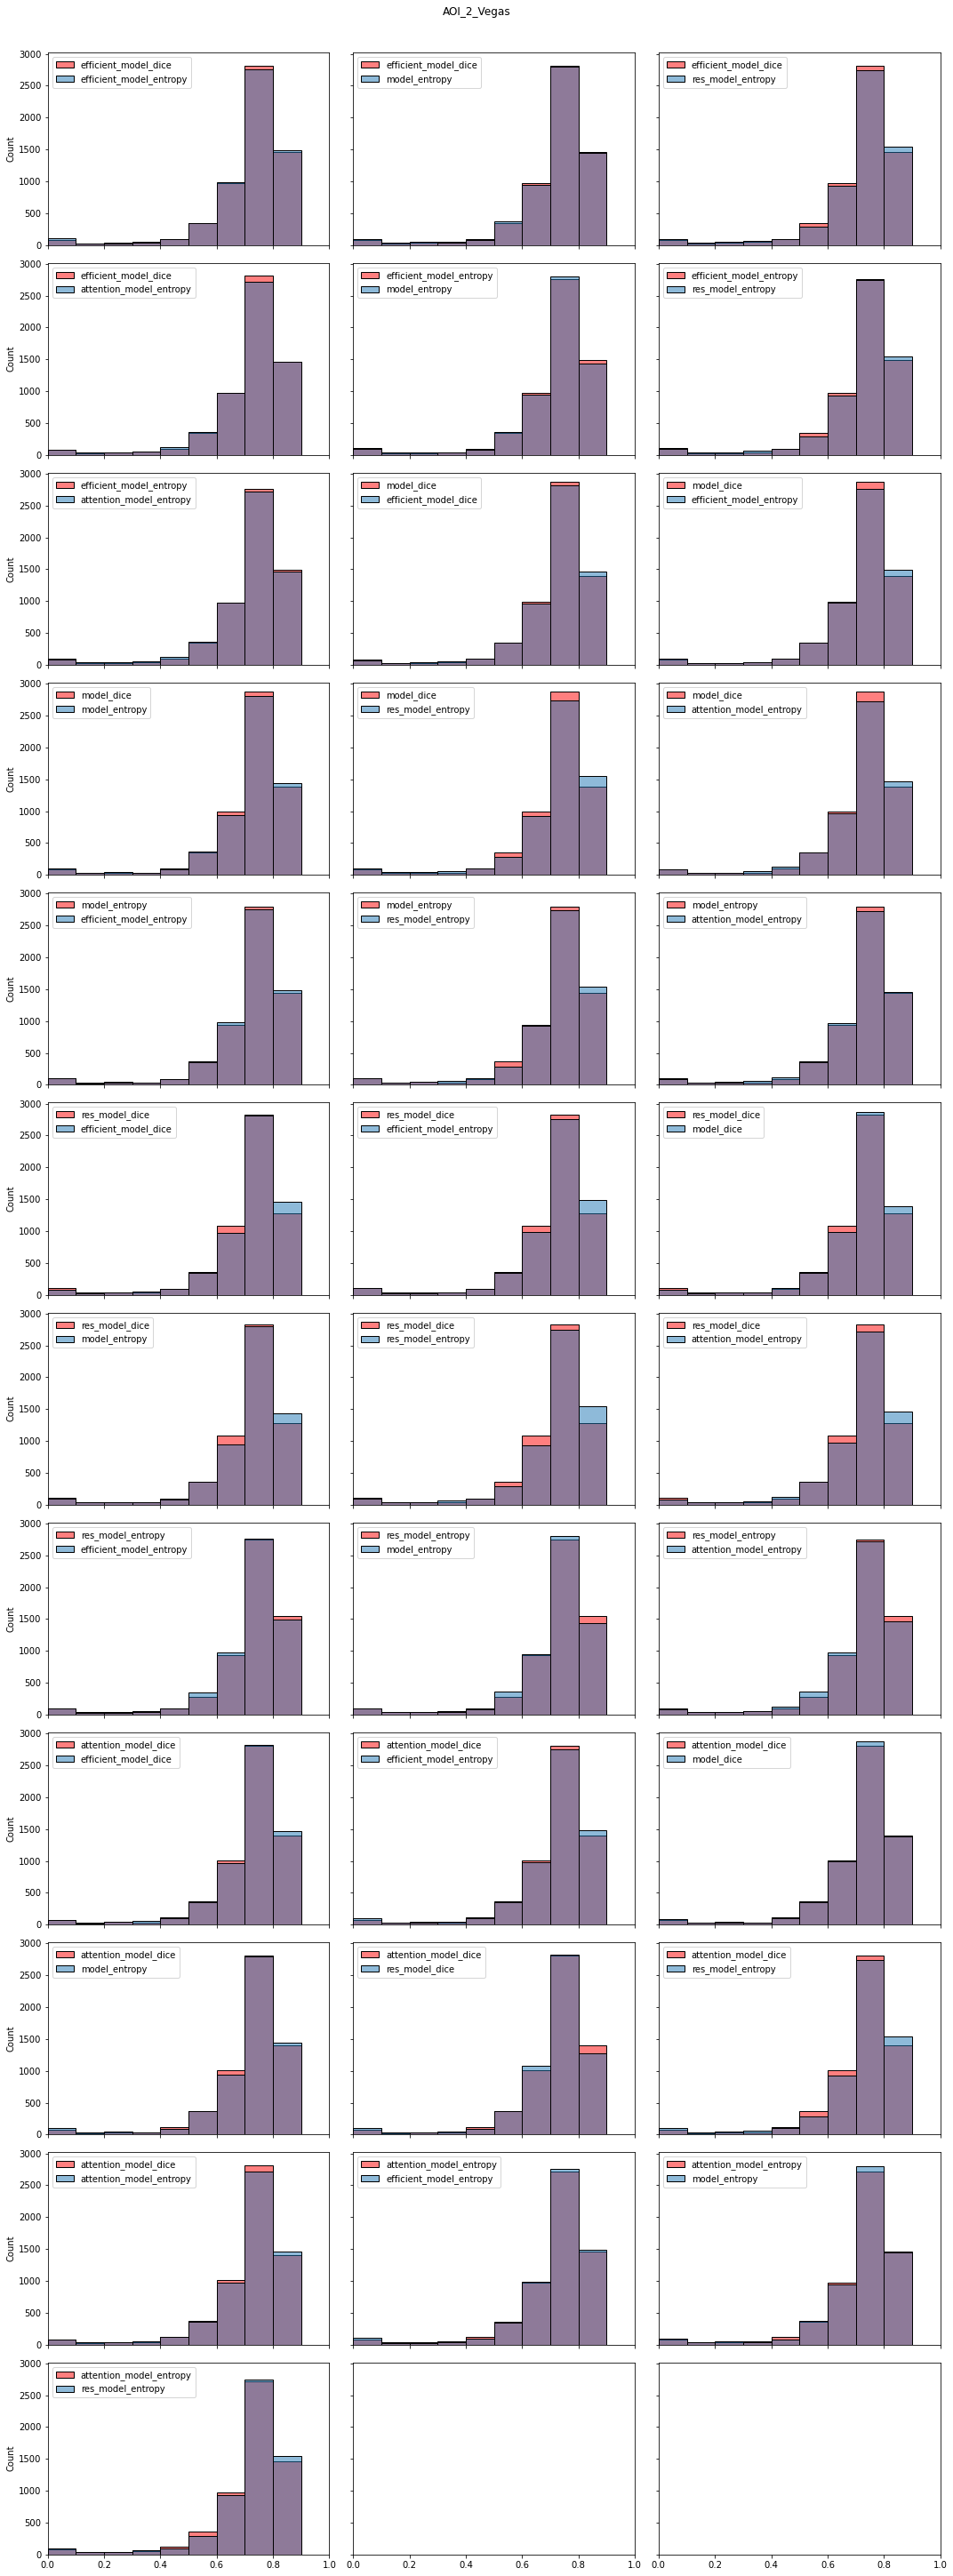

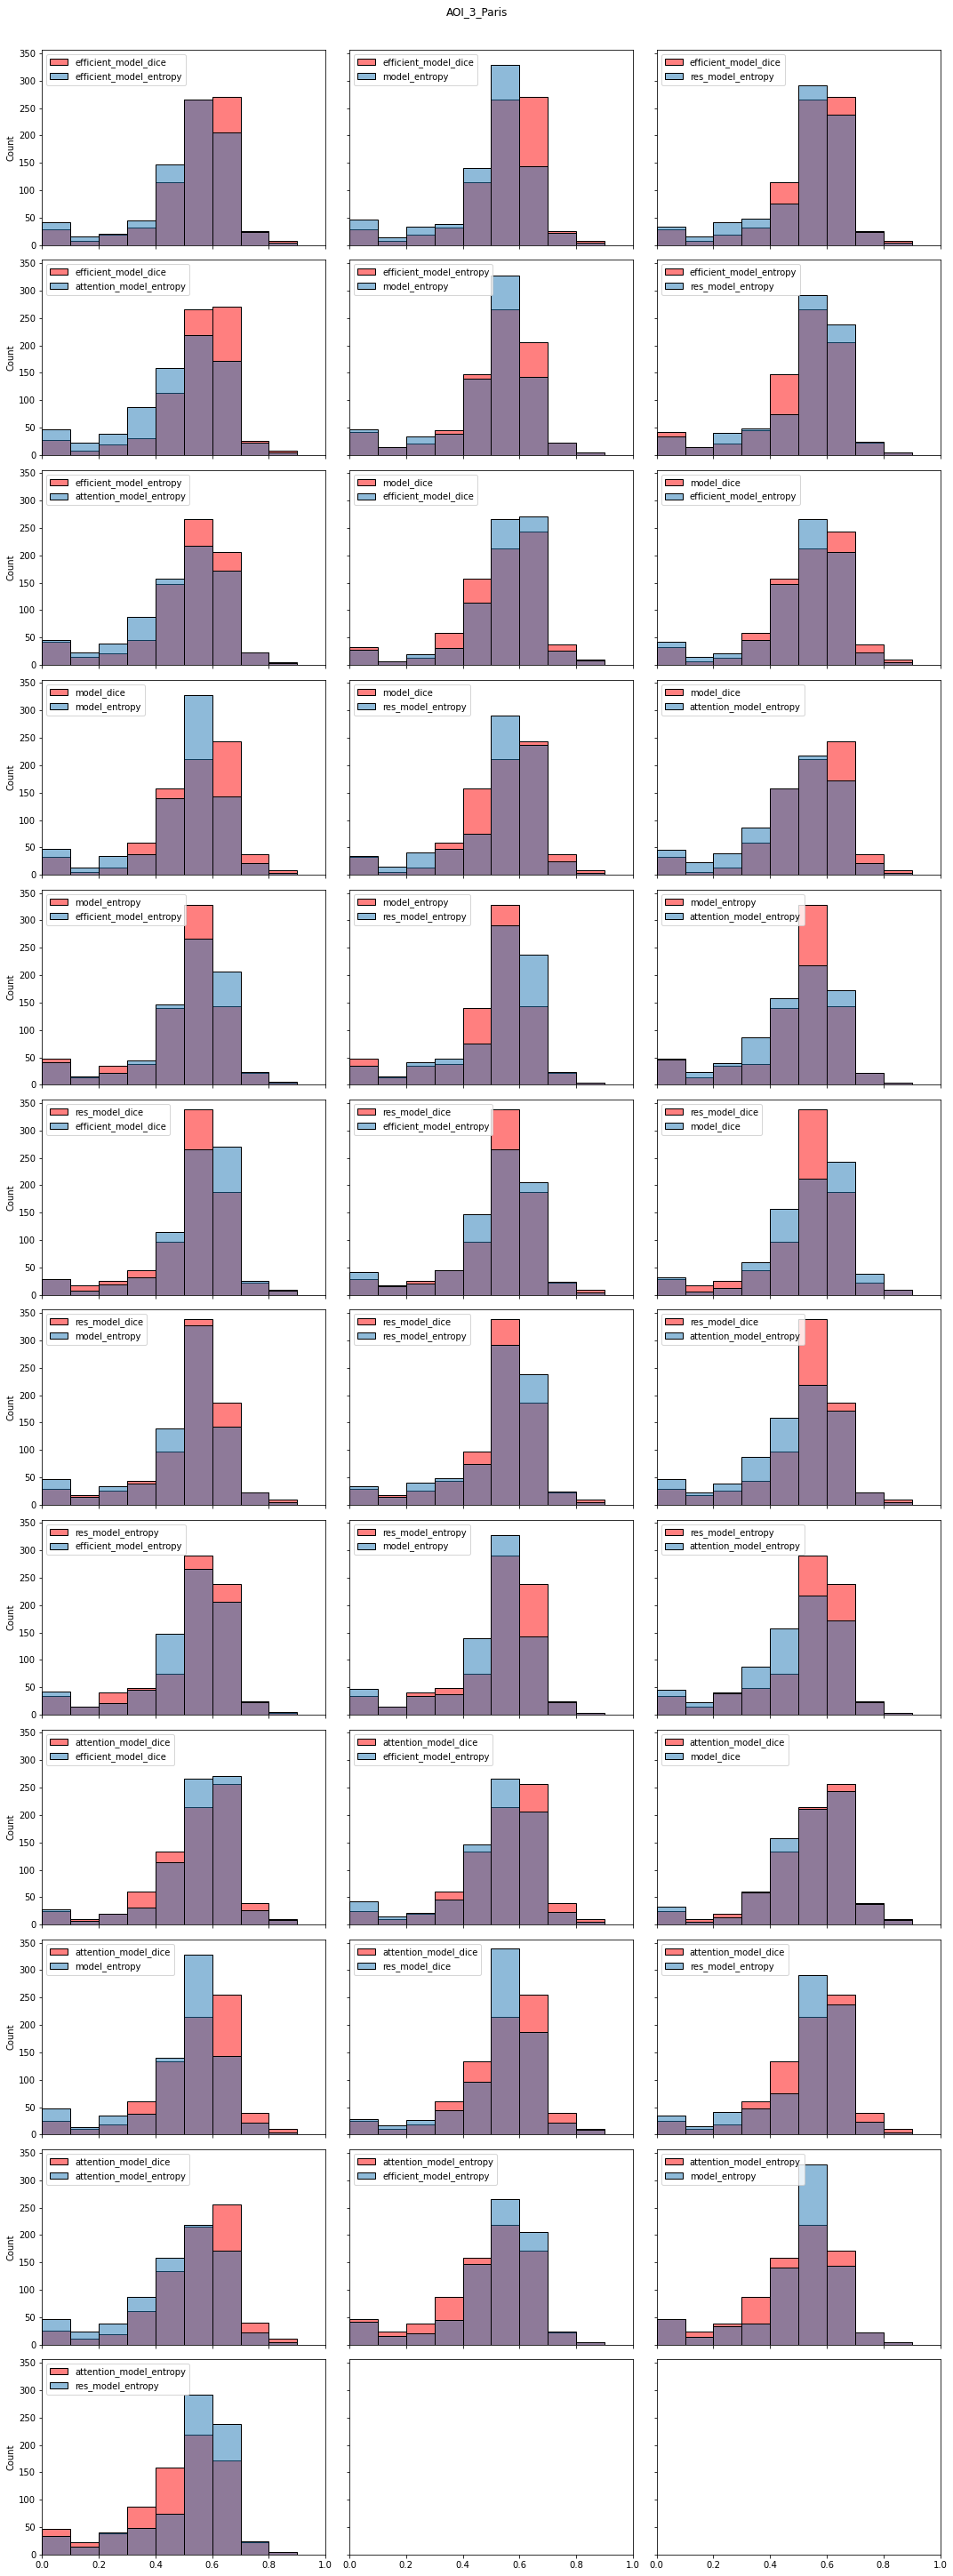

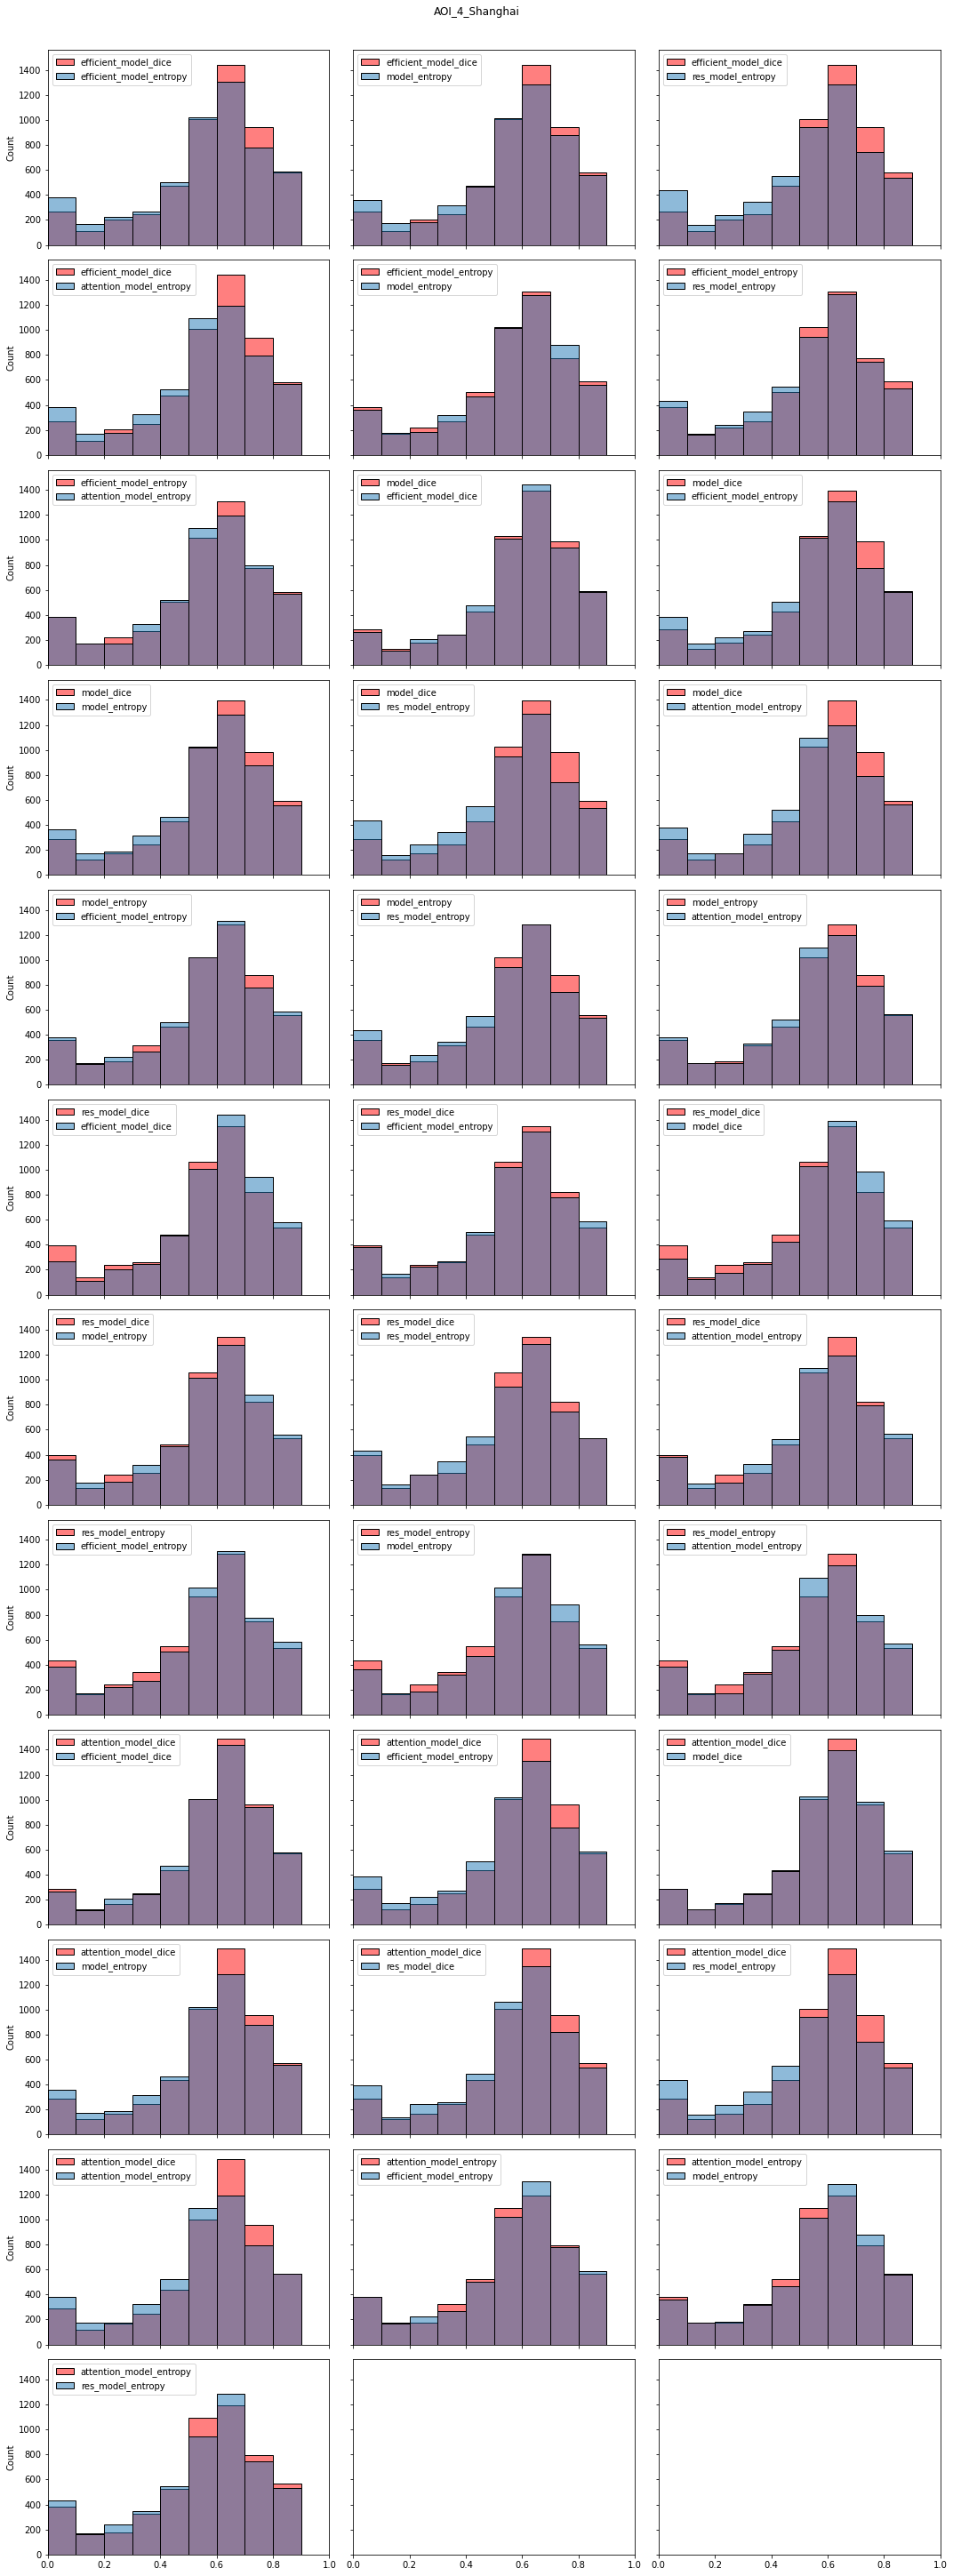

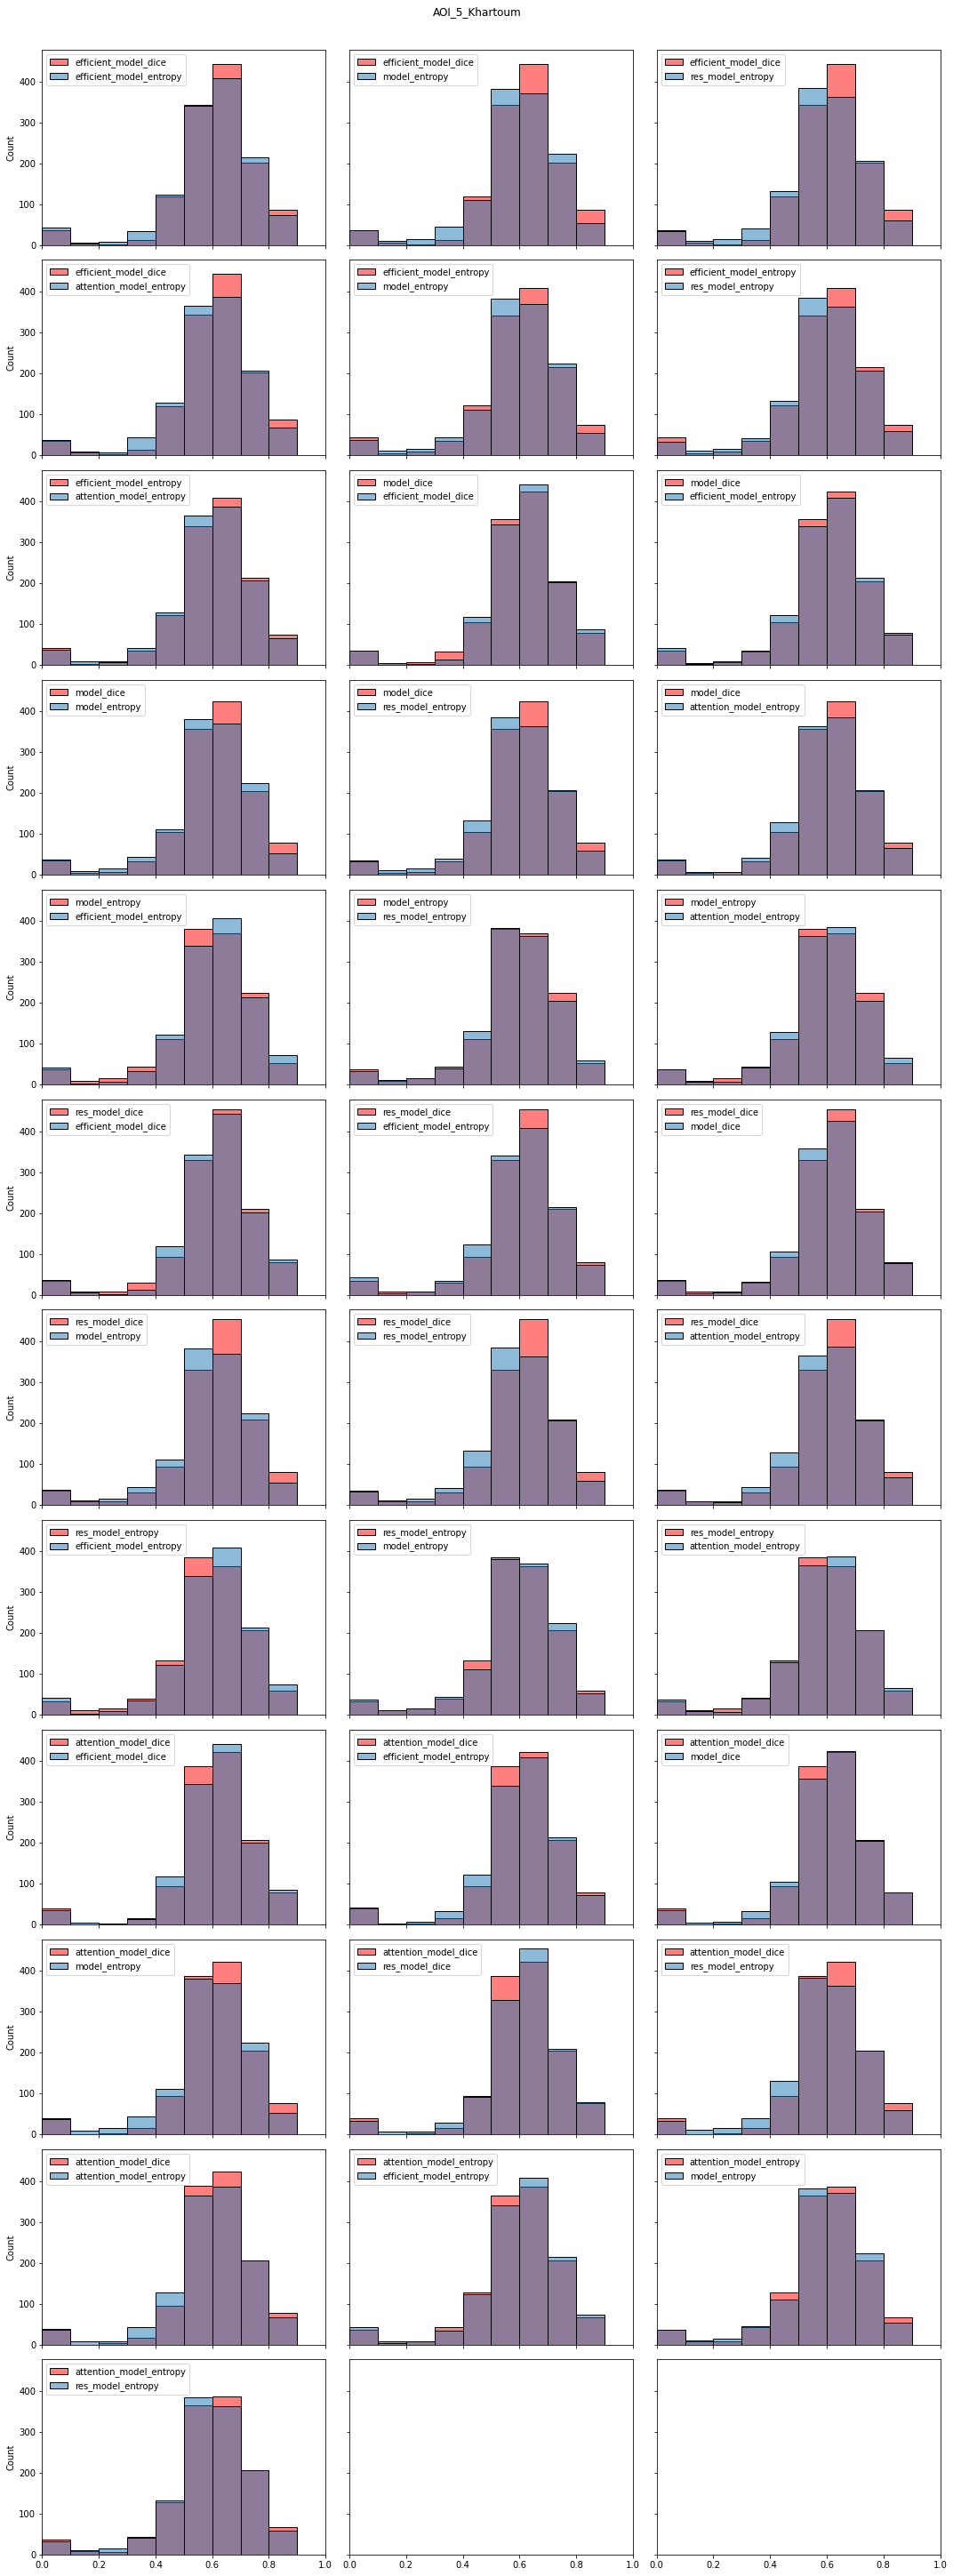

In [33]:
p_values_dict = {}
for area in areas_of_interest:
    p_values_dict[area] = pd.DataFrame(index=models, columns=models)
    fig, axs = plt.subplots(nrows=12,ncols=3,sharex=True, sharey=True, figsize=(3 * 5, 8 * 5))
    axs = np.ravel(axs)
    fig.suptitle(area, y = 1.005)
    count = 0
    for m1, m2 in pairs:
        if m1 != m2:
            ax = axs[count]
            sns.histplot(x=model_metrics[m1]['building_iou'][area], bins=np.arange(0, 1, 0.1), label=f'{m1}', ax=ax, color='red', alpha=0.5)
            sns.histplot(x=model_metrics[m2]['building_iou'][area], bins=np.arange(0, 1, 0.1), label=f'{m2}', ax=ax, alpha=0.5)
            ax.set_xlim([0,1])
            ax.legend(loc="upper left")
            _, p_val = stats.ttest_ind(model_metrics[m1]['building_iou'][area], model_metrics[m2]['building_iou'][area], alternative ='greater')
            p_values_dict[area].loc[m1, m2] = p_val
            #print(f'[{area}] The for {m1} > {m2} p-value is {p_val: 0.5f}')
            count += 1
    fig.tight_layout()
    plt.show()

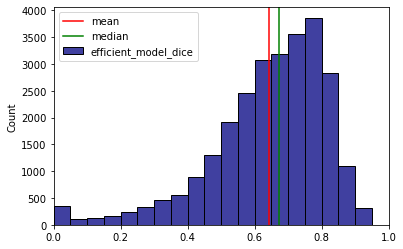

efficient_model_dice has a mean IoU of 0.642
efficient_model_dice has a median IoU of 0.673


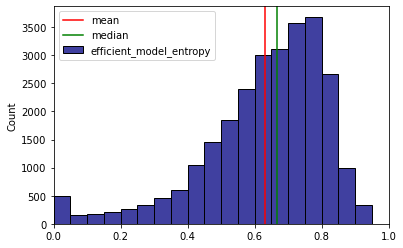

efficient_model_entropy has a mean IoU of 0.631
efficient_model_entropy has a median IoU of 0.666


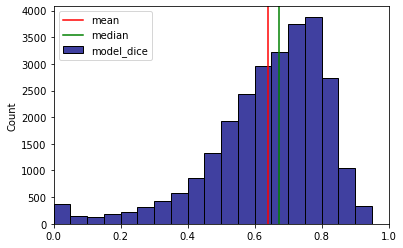

model_dice has a mean IoU of 0.641
model_dice has a median IoU of 0.674


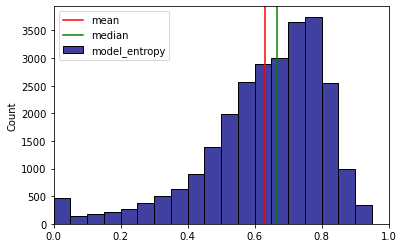

model_entropy has a mean IoU of 0.630
model_entropy has a median IoU of 0.666


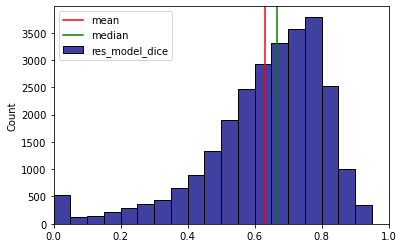

res_model_dice has a mean IoU of 0.632
res_model_dice has a median IoU of 0.668


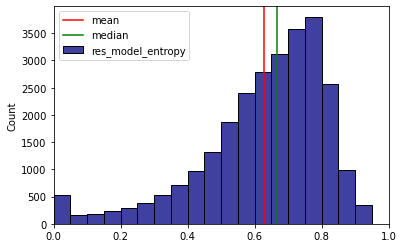

res_model_entropy has a mean IoU of 0.627
res_model_entropy has a median IoU of 0.666


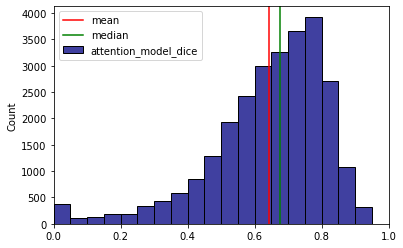

attention_model_dice has a mean IoU of 0.642
attention_model_dice has a median IoU of 0.675


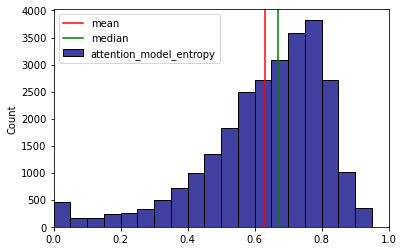

attention_model_entropy has a mean IoU of 0.632
attention_model_entropy has a median IoU of 0.670


In [12]:
combined_data = {}
for area in areas_of_interest:
    for m1 in models:
        if m1 not in combined_data.keys():
             combined_data[m1]= []
        combined_data[m1] += model_metrics[m1]['road_iou'][area] + model_metrics[m1]['building_iou'][area]
for m1 in models:
    sns.histplot(x=combined_data[m1], bins=np.arange(0, 1, 0.05), label=f'{m1}', color='navy', legend=m1)
    plt.xlim([0,1])
    plt.axvline(np.mean(combined_data[m1]), label='mean', c ='red')
    plt.axvline(np.median(combined_data[m1]), label='median', c='green')
    plt.legend()
    plt.show()
    print(f'{m1} has a mean IoU of {np.mean(combined_data[m1]):0.03f}')
    print(f'{m1} has a median IoU of {np.median(combined_data[m1]):0.03f}')

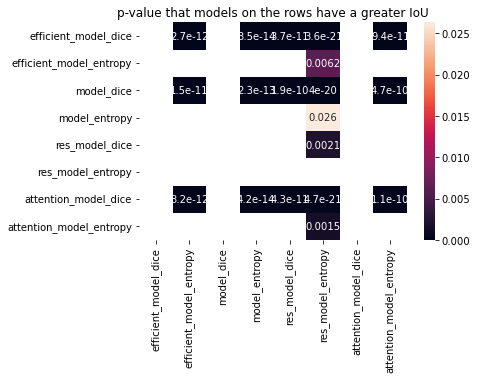

In [13]:
p_values = pd.DataFrame(index=models, columns=models, dtype=float)  

for m1, m2 in pairs:
    if m1 != m2:
        _, p_val = stats.ttest_ind(combined_data[m1], combined_data[m2], alternative ='greater')
        p_values.loc[m1, m2] = p_val
        p_values.loc[m2, m1] = 1 - p_val
    else:
        p_values.loc[m2, m1] = 1
plt.figure()
plt.title('p-value that models on the rows have a greater IoU')
sns.heatmap(p_values, mask = p_values > 0.1, annot=True)
plt.show()

While this is insightful, it doesn't account for the fact that we are doing multiple pair-wise p-value tests. 

We can fix this by calculating a fasle discovery rate corrected p-value:

In [14]:
from statsmodels.stats.multicomp import MultiComparison
input_data = []
input_group = []
for k in combined_data.keys():
    input_data += list(combined_data[k])
    input_group += [k for l in range(len(combined_data[k]))]
comp = MultiComparison(input_data, input_group)
tukey_hsd_results = comp.tukeyhsd()

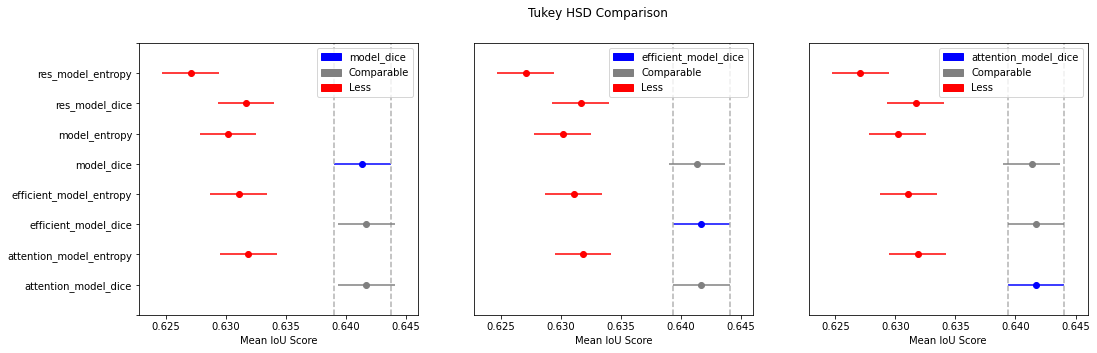

In [25]:
from matplotlib.patches import Patch
fig, ax = plt.subplots(1,3)
tukey_hsd_results.plot_simultaneous(comparison_name='model_dice', ax=ax[0], xlabel='Mean IoU Score')
tukey_hsd_results.plot_simultaneous(comparison_name='efficient_model_dice', ax=ax[1], xlabel='Mean IoU Score')
tukey_hsd_results.plot_simultaneous(comparison_name='attention_model_dice', ax=ax[2], xlabel='Mean IoU Score', figsize=(17, 5))
ax[0].set_title('')
ax[1].set_title('')
ax[2].set_title('')
fig.suptitle("Tukey HSD Comparison")
ax[0].legend(handles=[Patch(facecolor='blue', edgecolor='blue',
                         label='model_dice'), Patch(facecolor='grey', edgecolor='grey',
                         label='Comparable'), Patch(facecolor='red', edgecolor='red',
                         label='Less')], loc="upper right")
ax[1].legend(handles=[Patch(facecolor='blue', edgecolor='blue',
                         label='efficient_model_dice'), Patch(facecolor='grey', edgecolor='grey',
                         label='Comparable'), Patch(facecolor='red', edgecolor='red',
                         label='Less')], loc="upper right")
ax[2].legend(handles=[Patch(facecolor='blue', edgecolor='blue',
                         label='attention_model_dice'), Patch(facecolor='grey', edgecolor='grey',
                         label='Comparable'), Patch(facecolor='red', edgecolor='red',
                         label='Less')], loc="upper right")
ax[1].axes.get_yaxis().set_visible(False)
ax[2].axes.get_yaxis().set_visible(False)
plt.show()

What we are seeing that the dice loss performs better than the categorical cross-entropy for providing a higher IoU on average per an image.

However, when using the dice loss function we do not find statistically significant evidence that the average IoU per image is better between the models, except for the residual UNet model.

The same results that are displayed above are shown in the table below:

In [26]:
tukey_hsd_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
attention_model_dice,attention_model_entropy,-0.0098,0.0,-0.0146,-0.0051,True
attention_model_dice,efficient_model_dice,0.0,1.0,-0.0047,0.0047,False
attention_model_dice,efficient_model_entropy,-0.0106,0.0,-0.0153,-0.0059,True
attention_model_dice,model_dice,-0.0004,1.0,-0.0051,0.0044,False
attention_model_dice,model_entropy,-0.0115,0.0,-0.0163,-0.0068,True
attention_model_dice,res_model_dice,-0.01,0.0,-0.0148,-0.0053,True
attention_model_dice,res_model_entropy,-0.0146,0.0,-0.0194,-0.0099,True
attention_model_entropy,efficient_model_dice,0.0098,0.0,0.0051,0.0146,True
attention_model_entropy,efficient_model_entropy,-0.0008,0.9997,-0.0055,0.004,False
attention_model_entropy,model_dice,0.0095,0.0,0.0048,0.0142,True
